In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import math
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error

In [39]:
import pandas as pd
df=pd.read_csv('titanic_data.csv')
df['Fare']=df['Fare'].astype(float)
df['Age'].fillna(df.Age.mean(),inplace=True)
df=df.drop(columns=['Cabin','Ticket','Name',])
df.isnull().sum()
df[df['Embarked'].isnull()]
df.loc[61,'Embarked']='S'
df.loc[829,'Embarked']='Q'
df.isnull().sum()
df
df['Embarked'].unique()


C:\Users\DELL\AppData\Local\Temp\ipykernel_2600\3545859029.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df.Age.mean(),inplace=True)


array(['S', 'C', 'Q'], dtype=object)

In [40]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder
# building x,y
x = df.drop(columns=['Survived'])
y = df['Survived']

# Initialize OneHotEncoder for 'Sex' and 'Embarked'
Sex_ohe = OneHotEncoder(drop='first', sparse_output=False)
E_ohe = OneHotEncoder(drop='first', sparse_output=False)

# Perform One-Hot Encoding
Sex_encoded = Sex_ohe.fit_transform(x[['Sex']])
E_encoded = E_ohe.fit_transform(x[['Embarked']])

# Create DataFrames for the encoded features
Sex_encoded_df = pd.DataFrame(Sex_encoded, columns=Sex_ohe.get_feature_names_out(['Sex']))
E_encoded_df = pd.DataFrame(E_encoded, columns=E_ohe.get_feature_names_out(['Embarked']))

# Drop original categorical columns
x = x.drop(columns=['Sex', 'Embarked'])

# concating x,Sex_encoded_df,E_encoded_df
x_final = pd.concat([x, Sex_encoded_df, E_encoded_df], axis=1).reset_index(drop=True)
x_final
x_final.isnull().sum()
y.isnull().sum()





0

In [28]:
# model selection

# model_params={
#     'svm':{
#         'model':SVC(),
#         'params':{
#             'C':[1,10,20],
#             'kernel':['rbf','linear']
#         }
#     },
#     'random_forest':{
#         'model':RandomForestClassifier(),
#         'params':{
#             'n_estimators':[1,25,10]
#         }
#     },
#     'logistic_regression':{
#         'model':LogisticRegression(),
#         'params':{
#             'C':[1,5,10]
#         }
#     }
# }

# scores=[]
# for model_name,mp in model_params.items():
#     clf=GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
#     clf.fit(x_final,y)
#     scores.append({
#         'model':model_name,
#         'best_score':clf.best_score_,
#         'best_param':clf.best_params_
#     })

# model_params = {
#     'svm': {
#         'model': SVC(gamma='scale'),  # Changed 'auto' to 'scale'
#         'params': {
#             'C': [1, 10],
#             'kernel': ['rbf',]
#         }
#     },
#     'random_forest': {
#         'model': RandomForestClassifier(),
#         'params': {
#             'n_estimators': [1, 10, 25]  # Fixed typo from 'n_estimaors' to 'n_estimators'
#         }
#     },
#     'logistic_regression': {
#         'model': LogisticRegression(),
#         'params': {
#             'C': [1, 5, 10]
#         }
#     }
# }


In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Model selection
model_params = {
    'svm': {
        'model': SVC(gamma='scale'),
        'params': {
            'C': [1, 10,15],  # Reduced options
            'kernel': ['rbf','liear']  # Start with one kernel
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [5,10, 25]  # Reduced options
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(),
        'params': {
            'C': [1, 5,10]
        }
    }
}

scores = []
for model_name, mp in model_params.items():
    # n_jobs=parallel processsing 
    # verbose to decrease computation
    clf = GridSearchCV(mp['model'], mp['params'], cv=3, n_jobs=-1, verbose=1)  # Adjusted here
    clf.fit(x_final, y)
    best_score = clf.best_score_
    best_params = clf.best_params_
    all_avg_scores = clf.cv_results_['mean_test_score']
    scores.append({
        'model': model_name,
        'best_score': best_score,
        'best_param': best_params,
        'all_avg_scores': all_avg_scores  
    })

# Display scores
scores=pd.DataFrame(scores)
scores


Fitting 3 folds for each of 6 candidates, totalling 18 fits


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
9 fits failed out of a total of 18.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\ProgramData\anaconda3\Lib\site-packages\sk

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Fitting 3 folds for each of 3 candidates, totalling 9 fits


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,model,best_score,best_param,all_avg_scores
0,svm,0.656566,"{'C': 15, 'kernel': 'rbf'}","[0.632996632996633, nan, 0.6520763187429854, n..."
1,random_forest,0.815937,{'n_estimators': 25},"[0.7542087542087542, 0.7867564534231201, 0.815..."
2,logistic_regression,0.777778,{'C': 5},"[0.7699214365881032, 0.7777777777777778, 0.772..."


In [75]:
# model trainnig 
from sklearn.model_selection import train_test_split
model=RandomForestClassifier(n_estimators=25)
x_train,x_test,y_train,y_test=train_test_split(x_final,y,test_size=0.3)
model.fit(x_train,y_train)

# model testing
model.score(x_test,y_test)

0.8694029850746269

In [79]:
# confusion matrics
from sklearn.metrics import confusion_matrix
y_predicted=model.predict(x_test)
ConfusionMatrix=confusion_matrix(y_test,y_predicted)
print(ConfusionMatrix)

# mean square error
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_predicted)
mse


[[148  10]
 [ 25  85]]


0.13059701492537312

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<function matplotlib.pyplot.show(close=None, block=None)>

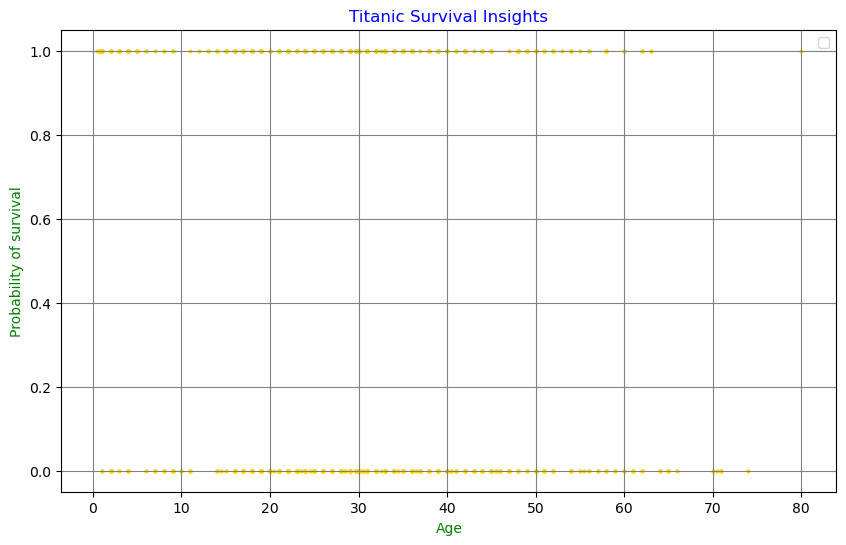

In [90]:
# x_final
plt.figure(figsize=(10, 6))
plt.scatter(x_final.Age,y,c='gold',s=4)
plt.grid(c='grey')
plt.xlabel('Age',c='green')
plt.ylabel('Probability of survival',c='green')
plt.title('Titanic Survival Insights',c= 'b')
plt.legend()
plt.show

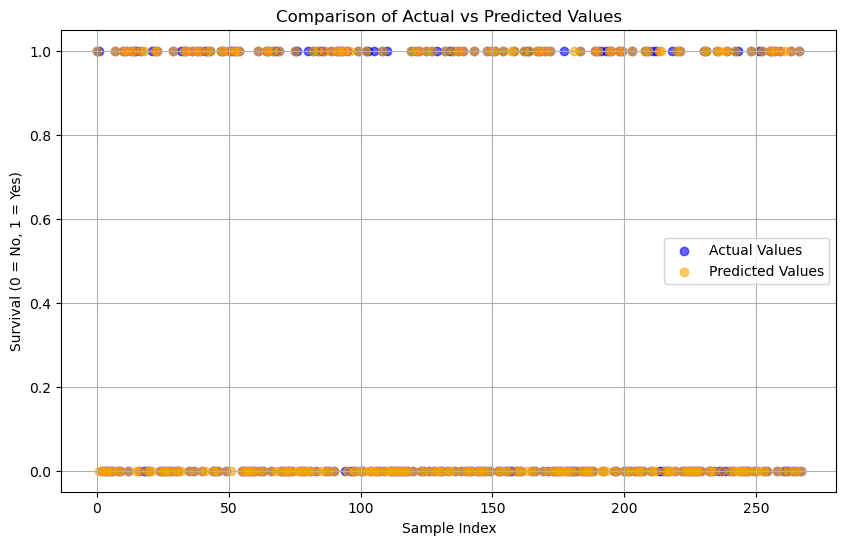

In [92]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Values', alpha=0.6)
plt.scatter(range(len(y_predicted)), y_predicted, color='orange', label='Predicted Values', alpha=0.6)
plt.title('Comparison of Actual vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Survival (0 = No, 1 = Yes)')
plt.legend()
plt.grid(True)
plt.show()
